<a href="https://colab.research.google.com/github/silo86/sentiment_analysis_of_covid-19_related_tweets_with_bidirectional_LSTM/blob/main/sentiment_analysis_of_covid_19_related_tweets_with_bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%ls drive/MyDrive/Colab\ Notebooks/Tensorflow\ Professional\ Certificate/data

Corona_NLP_train.csv  Corona_NLP_train.csv.zip  my_model.h5


In [2]:
%ls

drive/  sample_data/


In [3]:
import os
import zipfile

local_zip= './drive/MyDrive/Colab Notebooks/Tensorflow Professional Certificate/data/Corona_NLP_train.csv.zip'
zip = zipfile.ZipFile(local_zip,'r')
zip.extractall('./drive/MyDrive/Colab Notebooks/Tensorflow Professional Certificate/data/')
zip.close()

In [4]:
%ls drive/MyDrive/Colab\ Notebooks/Tensorflow\ Professional\ Certificate/data

Corona_NLP_train.csv  Corona_NLP_train.csv.zip  my_model.h5


In [5]:
csv_path = './drive/MyDrive/Colab Notebooks/Tensorflow Professional Certificate/data'

In [6]:
cd ./drive/MyDrive/Colab Notebooks/Tensorflow Professional Certificate/data

/content/drive/MyDrive/Colab Notebooks/Tensorflow Professional Certificate/data


In [7]:
import os
import pandas as pd
df = pd.read_csv('Corona_NLP_train.csv', encoding = "ISO-8859-1")
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [8]:
df.shape

(41157, 6)

In [9]:
df.iloc[0]['OriginalTweet']

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [10]:
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [11]:
import re
# need to remove \r\r
def cleanTxt(text):
    text = re.sub('@[A-Za-z_0-9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub('^\d+\s|\s\d+\s|\s\d+$','',text) #Removing numbers
    text = re.sub('[$0-9.]+','',text) #Removing prices
    return text

In [12]:
df.OriginalTweet = df.OriginalTweet.apply(lambda x: cleanTxt(x))

In [13]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,and and,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the COVI...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when is rationi...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [14]:
#sentences = list(df.OriginalTweet)
sentences = df.OriginalTweet
y = df.Sentiment

In [15]:
y.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [16]:
def to_numerical(string):
  if string == 'Extremely Negative' or string == 'Negative':
    return 0
  elif string == 'Neutral':
    return 1
  elif string == 'Positive' or string == 'Extremely Positive':
    return 2

In [17]:
y = y.apply(lambda x: to_numerical(x))
y.head()

0    1
1    2
2    2
3    2
4    0
Name: Sentiment, dtype: int64

In [18]:
limit = int(len(sentences) * 0.8)
limit

32925

In [19]:
#split into train/test set
train_sentences = sentences[:limit]
test_sentences = sentences[limit:]
y_train = y[:limit]
y_test = y[limit:]

print(train_sentences.shape,test_sentences.shape)
print(y_train.shape,y_test.shape)



(32925,) (8232,)
(32925,) (8232,)


In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [21]:
vocab_size = 100000
oov = '<OOV>'

In [22]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
print(word_index)


{'<OOV>': 1, 'the': 2, 'to': 3, '\r\r': 4, 'and': 5, 'of': 6, 'covid': 7, 'a': 8, 'in': 9, 'coronavirus': 10, 'for': 11, 'is': 12, 'are': 13, 'you': 14, 'on': 15, 'i': 16, 'this': 17, 'at': 18, 'prices': 19, 'food': 20, 'supermarket': 21, 'store': 22, 'with': 23, 'grocery': 24, 'that': 25, 'we': 26, 'have': 27, 'as': 28, 'be': 29, 'people': 30, 'it': 31, 'amp': 32, 'from': 33, 'all': 34, 'not': 35, 'your': 36, 'will': 37, 'my': 38, 'up': 39, 'they': 40, 'out': 41, 'our': 42, 'consumer': 43, 'can': 44, 'or': 45, 'if': 46, 'has': 47, 'but': 48, 'shopping': 49, 'more': 50, 'by': 51, 'online': 52, 'so': 53, 'their': 54, 'no': 55, 'how': 56, 'now': 57, 'during': 58, 'get': 59, 'panic': 60, 'need': 61, 'who': 62, 'just': 63, 'about': 64, 'what': 65, 'us': 66, 'pandemic': 67, 'workers': 68, 'do': 69, 'like': 70, 'time': 71, 'go': 72, 'was': 73, 'when': 74, 'home': 75, 'an': 76, 'there': 77, 'some': 78, 'stock': 79, 'demand': 80, 'help': 81, 'going': 82, 'me': 83, 'buying': 84, 'one': 85, 's':

In [23]:
from keras.preprocessing.sequence import pad_sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)

In [24]:
maxlen = max([len(sentence) for sentence in train_sentences])
maxlen

315

In [25]:
padded_train_sequences = pad_sequences(train_sequences,maxlen)

In [26]:
testing_sequences = tokenizer.texts_to_sequences(test_sentences)
padded_test_sequences = pad_sequences(testing_sequences,maxlen=maxlen)

In [27]:
#y_train = tf.keras.utils.to_categorical(y_train)
y_test.value_counts()

2    3821
0    2772
1    1639
Name: Sentiment, dtype: int64

In [28]:
model = keras.models.Sequential([
                                 tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=64,input_length=maxlen),
                                 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                 #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                                 #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 tf.keras.layers.Dropout(0.4),
                                 tf.keras.layers.Dense(1024,activation='relu'),
                                 tf.keras.layers.Dropout(0.4),
                                 tf.keras.layers.Dense(3,activation='softmax')


])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 315, 64)           6400000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 512)               33280     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                        

In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [31]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_model.h5',save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('val_accuracy')>= 0.95:
      print('\n reached 95% val acc, so stop training ')
      self.model.stop_training=True
callbacks = myCallback()

In [32]:
import numpy as np

In [33]:
model.fit(np.array(padded_train_sequences),
          np.array(y_train),
          epochs=50,
          validation_data = [np.array(padded_test_sequences),np.array(y_test)],
          callbacks=[checkpoint_cb,early_stopping_cb,callbacks]
    
)

Epoch 1/50
1029/1029 [==============================] - 139s 125ms/step - loss: 0.7283 - accuracy: 0.7096 - val_loss: 0.5001 - val_accuracy: 0.8342
Epoch 2/50
1029/1029 [==============================] - 127s 123ms/step - loss: 0.3972 - accuracy: 0.8794 - val_loss: 0.5171 - val_accuracy: 0.8259
Epoch 3/50
1029/1029 [==============================] - 126s 123ms/step - loss: 0.2595 - accuracy: 0.9233 - val_loss: 0.5828 - val_accuracy: 0.8403
Epoch 4/50
1029/1029 [==============================] - 127s 123ms/step - loss: 0.2041 - accuracy: 0.9434 - val_loss: 0.6406 - val_accuracy: 0.8191
Epoch 5/50
1029/1029 [==============================] - 127s 123ms/step - loss: 0.1945 - accuracy: 0.9456 - val_loss: 0.7665 - val_accuracy: 0.8116
Epoch 6/50
1029/1029 [==============================] - 127s 123ms/step - loss: 0.1757 - accuracy: 0.9508 - val_loss: 0.9909 - val_accuracy: 0.8009
Epoch 7/50
1029/1029 [==============================] - 127s 123ms/step - loss: 0.1537 - accuracy: 0.9564 - val_

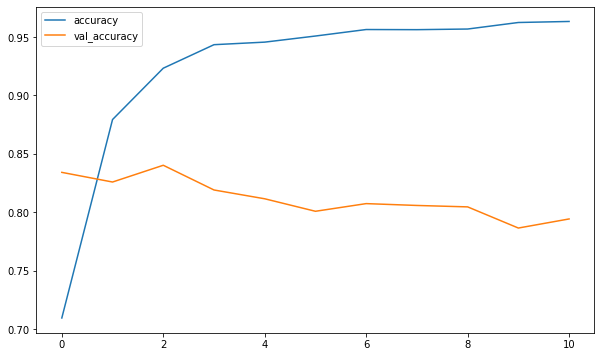

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_graph(history,string):
  plt.subplots(figsize=(10,6))
  s = model.history.history[string]
  val_s = model.history.history['val_'+ string]
  plt.plot(s)
  plt.plot(val_s)
  plt.legend([string,'val_'+ string])

plot_graph(model.history,'accuracy')

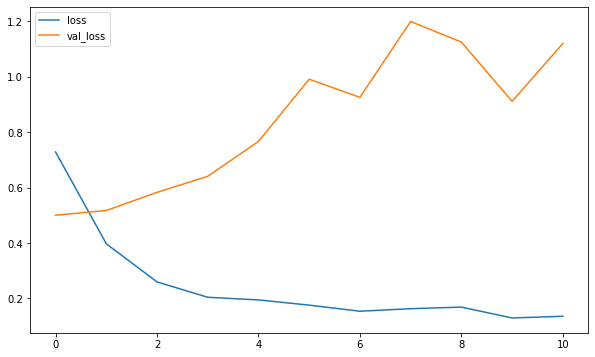

In [35]:
plot_graph(model.history,'loss')